In [1]:
import yfinance as yf


In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:

google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-28,25.788198,25.859003,25.071167,25.786703,25.786703,66710653
2014-04-29,25.774237,26.400517,25.745316,26.312757,26.312757,53981801
2014-04-30,26.307772,26.327717,26.054466,26.260900,26.260900,35023895
2014-05-01,26.283339,26.573542,26.122280,26.494759,26.494759,38110345
2014-05-02,26.614929,26.626896,26.208544,26.324226,26.324226,33770463


In [5]:

google_data.shape

(2518, 6)

In [6]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,72.788440,73.568466,72.070994,72.839971,72.839971,3.192699e+07
std,39.023044,39.490032,38.617118,39.058042,39.058042,1.536616e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.936000e+06
25%,38.984752,39.137501,38.685375,38.913750,38.913750,2.232176e+07
50%,58.786499,59.314650,58.129749,58.702251,58.702251,2.818100e+07
75%,105.549873,106.986998,104.729248,105.867502,105.867502,3.657400e+07
max,175.990005,176.419998,171.399994,173.690002,173.690002,2.232980e+08


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-04-28 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [24]:

google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

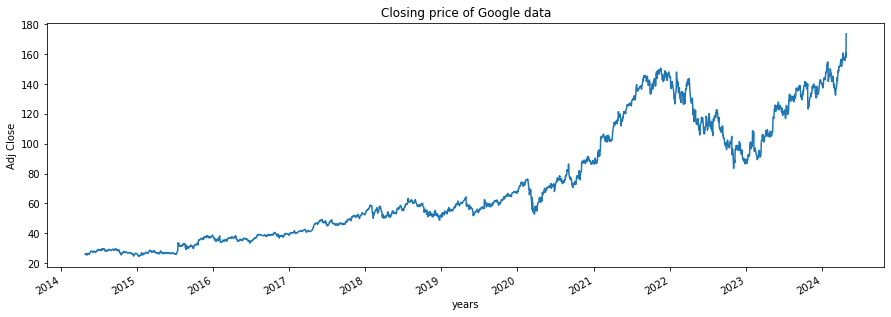

In [26]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [27]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [28]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

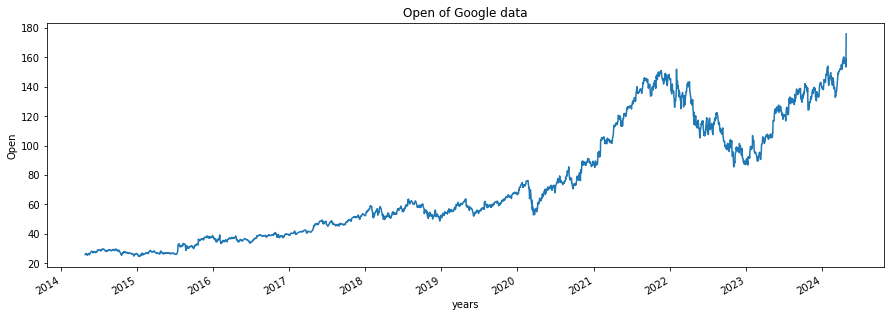

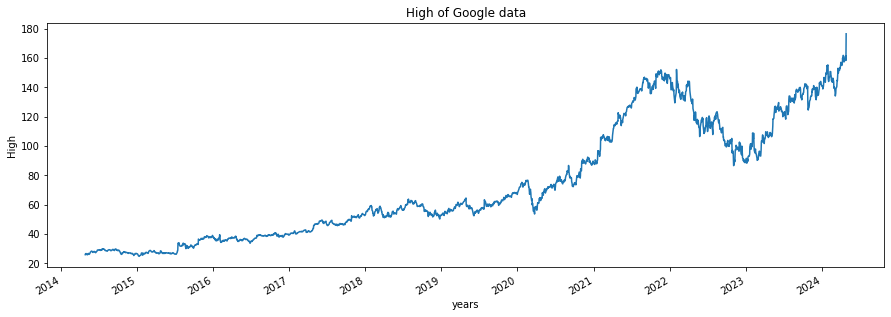

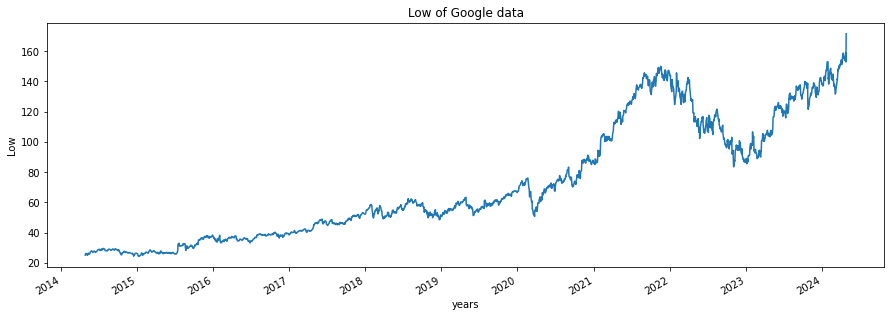

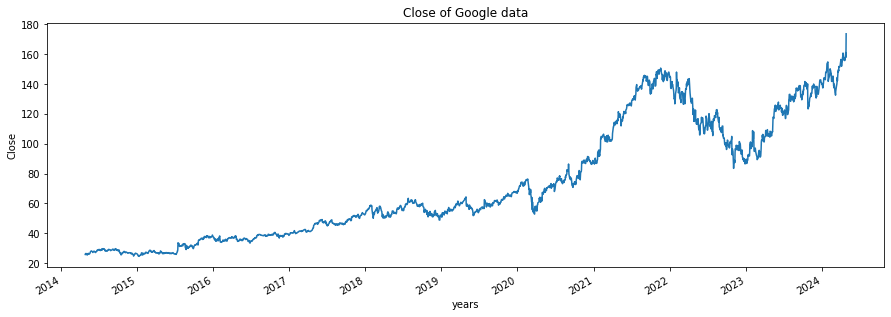

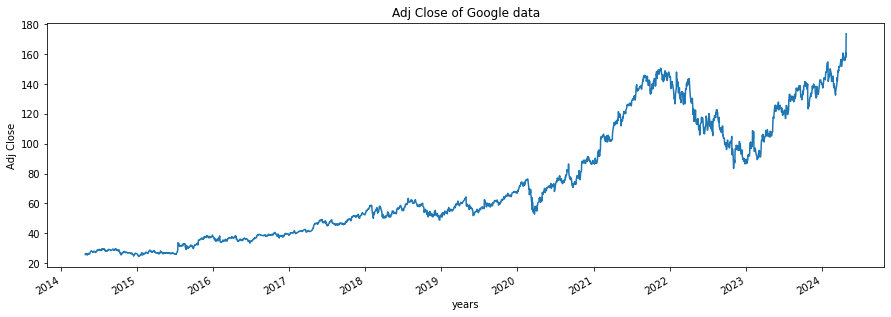

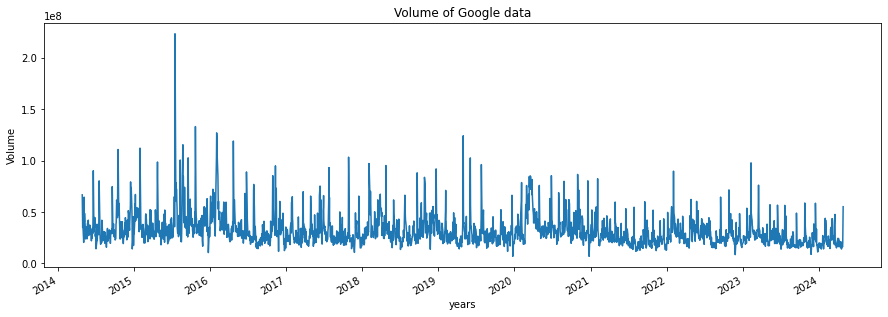

In [29]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [30]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [31]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [32]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [33]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 173
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 81


In [34]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [35]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-04-17          NaN
2015-04-20          NaN
2015-04-21          NaN
2015-04-22          NaN
2015-04-23    27.412989
Name: MA_for_250_days, dtype: float64

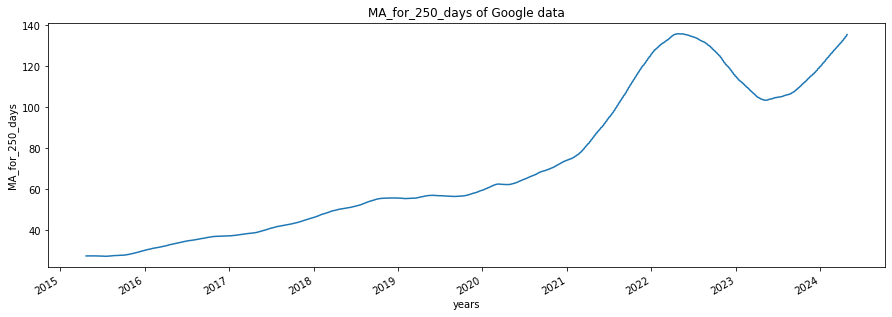

In [36]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')


<Figure size 432x288 with 0 Axes>

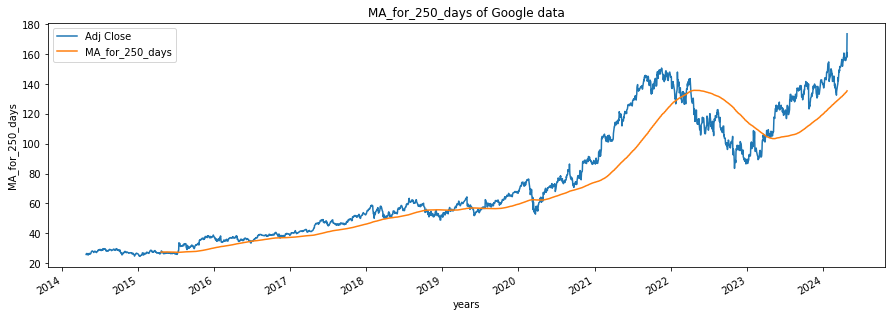

In [37]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 432x288 with 0 Axes>

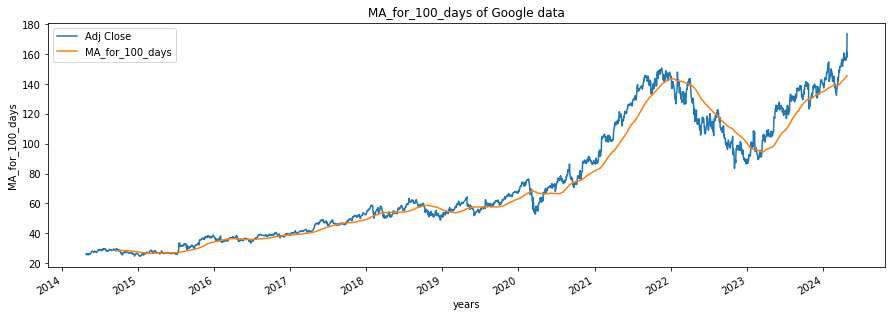

In [38]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 432x288 with 0 Axes>

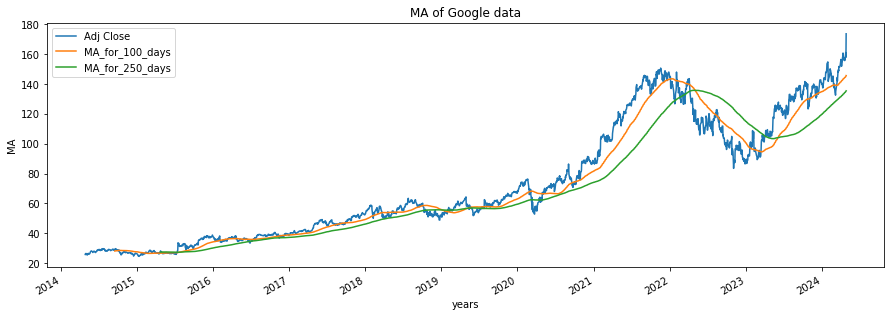

In [39]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [40]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-04-28,25.786703,NaN
2014-04-29,26.312757,0.020400
2014-04-30,26.260900,-0.001971
2014-05-01,26.494759,0.008905
2014-05-02,26.324226,-0.006436


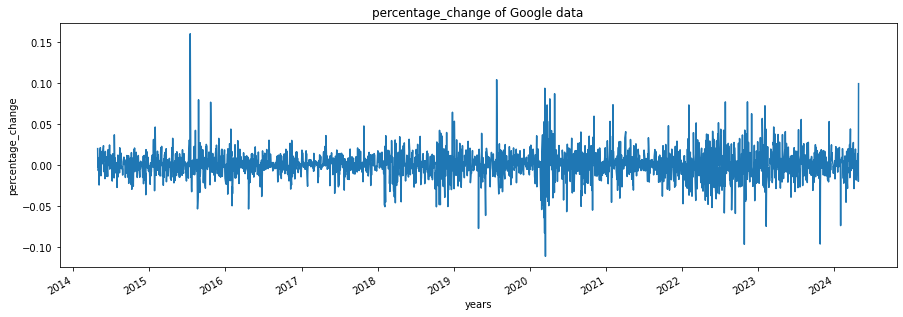

In [41]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [42]:
Adj_close_price = google_data[['Adj Close']]

In [43]:
max(Adj_close_price.values),min(Adj_close_price.values) 


(array([173.69000244]), array([24.56007004]))

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data


array([[0.00822526],
       [0.01175275],
       [0.01140502],
       ...,
       [0.915577  ],
       [0.89445442],
       [1.        ]])

In [45]:

len(scaled_data)

2518

In [46]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [47]:
x_data[0],y_data[0]

(array([[0.00822526],
        [0.01175275],
        [0.01140502],
        [0.01297317],
        [0.01182966],
        [0.01178954],
        [0.0075532 ],
        [0.00582121],
        [0.00616895],
        [0.00875355],
        [0.01249504],
        [0.01355496],
        [0.01140169],
        [0.0091715 ],
        [0.00938883],
        [0.01214062],
        [0.01244489],
        [0.01551097],
        [0.01755726],
        [0.02011176],
        [0.02454204],
        [0.02311432],
        [0.02257934],
        [0.02251582],
        [0.02052302],
        [0.01751712],
        [0.01742352],
        [0.02051299],
        [0.02132549],
        [0.02326143],
        [0.02273649],
        [0.02216474],
        [0.01966038],
        [0.01979746],
        [0.01729645],
        [0.01687181],
        [0.02033579],
        [0.02084736],
        [0.02133552],
        [0.02420767],
        [0.02409733],
        [0.0287884 ],
        [0.02790235],
        [0.02831696],
        [0.02766162],
        [0

In [48]:
int(len(x_data)*0.7)

1692

In [49]:
4908-100-int(len(x_data)*0.7)

3116

In [50]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1692, 100, 1)
(1692, 1)
(726, 100, 1)
(726, 1)


In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
1692/1692 [==============================] - 38s 21ms/step - loss: 8.0827e-04
Epoch 2/2
1692/1692 [==============================] - 38s 23ms/step - loss: 2.7808e-04


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [57]:
predictions = model.predict(x_test)

In [58]:
predictions

array([[0.66914546],
       [0.67468745],
       [0.68150353],
       [0.68588746],
       [0.6894947 ],
       [0.6910406 ],
       [0.69073015],
       [0.69124466],
       [0.6902234 ],
       [0.6908787 ],
       [0.69302136],
       [0.69399846],
       [0.6960568 ],
       [0.6972758 ],
       [0.6975407 ],
       [0.6957815 ],
       [0.6924553 ],
       [0.69174224],
       [0.6968887 ],
       [0.70463747],
       [0.7116663 ],
       [0.714536  ],
       [0.7159377 ],
       [0.718316  ],
       [0.72109437],
       [0.7253904 ],
       [0.72721106],
       [0.72890043],
       [0.72468185],
       [0.72362286],
       [0.7268843 ],
       [0.7321626 ],
       [0.74586064],
       [0.76195973],
       [0.76820093],
       [0.76850444],
       [0.76682985],
       [0.76210624],
       [0.7593749 ],
       [0.7587023 ],
       [0.758518  ],
       [0.7605803 ],
       [0.7630408 ],
       [0.76698667],
       [0.7704491 ],
       [0.7719043 ],
       [0.77369803],
       [0.775

In [59]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[124.349686],
       [125.17616 ],
       [126.19264 ],
       [126.84642 ],
       [127.38437 ],
       [127.61491 ],
       [127.56861 ],
       [127.64534 ],
       [127.493034],
       [127.59076 ],
       [127.91029 ],
       [128.05602 ],
       [128.36298 ],
       [128.54477 ],
       [128.58426 ],
       [128.32191 ],
       [127.82588 ],
       [127.71954 ],
       [128.48703 ],
       [129.64261 ],
       [130.69081 ],
       [131.11877 ],
       [131.3278  ],
       [131.6825  ],
       [132.09682 ],
       [132.73749 ],
       [133.009   ],
       [133.26094 ],
       [132.63182 ],
       [132.47389 ],
       [132.96028 ],
       [133.74742 ],
       [135.79022 ],
       [138.19107 ],
       [139.12183 ],
       [139.16708 ],
       [138.91736 ],
       [138.21292 ],
       [137.8056  ],
       [137.70529 ],
       [137.67781 ],
       [137.98535 ],
       [138.3523  ],
       [138.94073 ],
       [139.45709 ],
       [139.6741  ],
       [139.9416  ],
       [140.1

In [60]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[124.56999969],
       [126.08000183],
       [125.69650269],
       [126.35199738],
       [126.03299713],
       [125.69650269],
       [126.3710022 ],
       [125.56749725],
       [126.45500183],
       [126.99949646],
       [126.46150208],
       [127.28199768],
       [126.99500275],
       [126.81950378],
       [126.01850128],
       [125.31600189],
       [126.36849976],
       [128.71899414],
       [129.77099609],
       [130.07749939],
       [129.17700195],
       [129.57449341],
       [130.56399536],
       [130.99450684],
       [132.08250427],
       [131.26649475],
       [131.84550476],
       [129.2539978 ],
       [131.10150146],
       [132.60049438],
       [133.32850647],
       [137.81599426],
       [139.64450073],
       [136.79649353],
       [136.38150024],
       [136.54049683],
       [135.22099304],
       [135.98950195],
       [136.27999878],
       [136.02850342],
       [136.94000244],
       [137.03599548],
       [138.0019989 ],
       [138

In [61]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [62]:

rmse

3.4694421928593115

In [63]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),s
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-06-09,124.570000,124.349686
2021-06-10,126.080002,125.176163
2021-06-11,125.696503,126.192642
2021-06-14,126.351997,126.846420
2021-06-15,126.032997,127.384369


<Figure size 432x288 with 0 Axes>

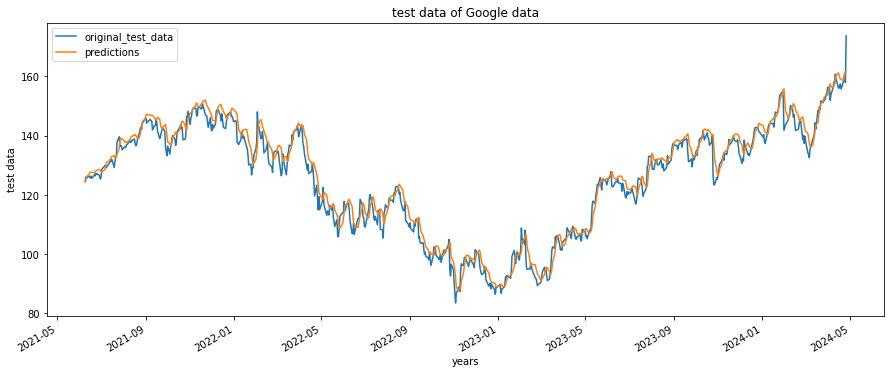

In [64]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 432x288 with 0 Axes>

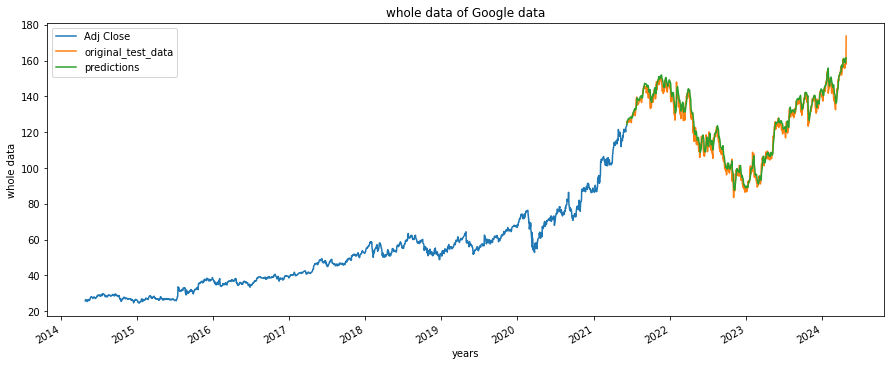

In [65]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [66]:
model.save("Latest_stock_price_model.keras")